### Imports and data loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
# import graphviz



In [2]:
train_set_df=pd.read_csv("train_telecom_marketing_data.csv") #loading train set
tests_set_df=pd.read_csv("test_telecom_marketing_data.csv") #loading train set

### 1.Data exploration

##### Describing the different features 

In [3]:
train_set_df.describe() #exploring numerical features - fillna with avarage

,customer_id,customer_age,day_of_week,current_campaign_contacts,current_campaign_contacts.1,previous_campaign_contacts,B,C,D
count,13442.000000,13300.000000,13190.000000,13449.000000,13445.000000,13446.000000,13280.000000,13299.000000,13291.000000
mean,138453.060259,40.947143,15.842911,2.754406,2.754481,0.599063,1317.681175,99.936119,4.999402
std,13099.576108,10.628621,8.330930,3.052970,3.053117,3.022705,2787.815205,9.990861,1.492469
min,115894.000000,18.000000,1.000000,1.000000,1.000000,0.000000,-8019.000000,58.284455,-0.818955
25%,127068.250000,33.000000,8.000000,1.000000,1.000000,0.000000,73.000000,93.185252,3.988167
50%,138418.000000,39.000000,16.000000,2.000000,2.000000,0.000000,441.000000,99.807706,4.987957
75%,149754.500000,48.000000,21.000000,3.000000,3.000000,0.000000,1407.250000,106.710183,6.011117
max,161097.000000,95.000000,31.000000,63.000000,63.000000,275.000000,59649.000000,137.279368,10.899899


In [4]:
train_set_df.groupby('job_type')['job_type'].count() #exploring categorial features - categorial (dummies)

job_type
admin.           1526
blue-collar      2843
entrepreneur      422
housemaid         380
management       2848
retired           669
self-employed     483
services         1202
student           281
technician       2303
unemployed        398
Name: job_type, dtype: int64

In [5]:
train_set_df.groupby('marital_status')['marital_status'].count() #exploring categorial features - categorial (dummies)

marital_status
divorced    1543
married     8069
single      3641
Name: marital_status, dtype: int64

In [6]:
train_set_df.groupby('education_level')['education_level'].count() #exploring categorial features - ordinaly null(0) primary (1) secondary (2) tertiary (3)

education_level
primary      2008
secondary    6843
tertiary     4017
Name: education_level, dtype: int64

In [7]:
train_set_df.groupby('day_of_week')['day_of_week'].count() #exploring categorial features

day_of_week
1.0      97
2.0     384
3.0     305
4.0     421
5.0     561
6.0     546
7.0     535
8.0     553
9.0     424
10.0    154
11.0    445
12.0    492
13.0    447
14.0    515
15.0    476
16.0    391
17.0    580
18.0    674
19.0    512
20.0    814
21.0    622
22.0    262
23.0    268
24.0    125
25.0    234
26.0    318
27.0    344
28.0    564
29.0    507
30.0    429
31.0    191
Name: day_of_week, dtype: int64

In [8]:
train_set_df.groupby('has_device_payment_plan')['has_device_payment_plan'].count() #exploring categorial features - nulls (random by percentage) no(0) yes(1)

#Need to allign all values to yes/no

has_device_payment_plan
No     1134
no     9968
yes    2169
Name: has_device_payment_plan, dtype: int64

In [9]:
train_set_df.groupby('preferred_contact_method')['preferred_contact_method'].count() #exploring categorial features - categorial (dummies)

preferred_contact_method
SMS       413
call     8681
email     426
Name: preferred_contact_method, dtype: int64

In [10]:
train_set_df.groupby('Month')['Month'].count() #exploring categorial features - nulls (5 or random)

Month
apr     851
aug    1875
dec      72
feb     755
jan     399
jul    2009
jun    1581
mar     146
may    4032
nov    1170
oct     225
sep     160
Name: Month, dtype: int64

In [11]:
#need to deal with differnet inputs for same meaning
train_set_df.groupby('preferred_call_time')['preferred_call_time'].count() #exploring categorial features - categorial (dummies)

preferred_call_time
Afternoon    1927
Evening      1922
Morning      1932
Night        1873
Night        1945
eve          1942
morning      1907
Name: preferred_call_time, dtype: int64

In [12]:
train_set_df.groupby('previous_campaign_outcome')['previous_campaign_outcome'].count() #exploring categorial features - categorial (dummies)

previous_campaign_outcome
failure    1468
other       563
success     465
Name: previous_campaign_outcome, dtype: int64

In [13]:
train_set_df.groupby('A')['A'].count() #exploring categorial features - nulls (random by percentage) no(0) yes(1)

A
no     13072
yes      223
Name: A, dtype: int64

In [14]:
train_set_df.groupby('subscribed_to_new_plan')['subscribed_to_new_plan'].count() #exploring categorial features  no(0) yes(1)

subscribed_to_new_plan
no     11911
yes     1539
Name: subscribed_to_new_plan, dtype: int64

In [15]:
train_set_df.groupby('has_internet_service')['has_internet_service'].count() #exploring categorial features  no(0) yes(1)

has_internet_service
no     5910
yes    7305
Name: has_internet_service, dtype: int64

In [16]:
train_set_df.isna().sum() #checking for missing entries

customer_id                        8
customer_age                     150
job_type                          95
marital_status                   197
education_level                  582
has_internet_service             235
has_device_payment_plan          179
preferred_contact_method        3930
day_of_week                      260
Month                            175
preferred_call_time                2
current_campaign_contacts          1
current_campaign_contacts.1        5
previous_campaign_contacts         4
previous_campaign_outcome      10954
A                                155
B                                170
C                                151
D                                159
subscribed_to_new_plan             0
dtype: int64

##### Corellation analysis

In [17]:
df_encoded = pd.get_dummies(train_set_df, drop_first=False)
df_encoded.corr()
#need to get rid of current_campaign_contacts.1	

,customer_id,customer_age,day_of_week,current_campaign_contacts,current_campaign_contacts.1,previous_campaign_contacts,B,C,D,job_type_admin.,...,preferred_call_time_Night,preferred_call_time_eve,preferred_call_time_morning,previous_campaign_outcome_failure,previous_campaign_outcome_other,previous_campaign_outcome_success,A_no,A_yes,subscribed_to_new_plan_no,subscribed_to_new_plan_yes
customer_id,1.000000,0.023118,-0.066297,-0.108075,-0.107968,0.214220,0.072549,0.011208,0.008541,0.013670,...,-0.000331,-0.003789,0.000908,0.338467,0.210067,0.271907,0.039066,-0.050202,-0.290928,0.290928
customer_age,0.023118,1.000000,0.000450,-0.000632,-0.000664,0.001192,0.092869,0.017718,-0.002533,-0.050755,...,-0.002532,0.002689,-0.009771,0.009483,-0.026997,0.033600,0.015009,-0.022429,-0.029499,0.029499
day_of_week,-0.066297,0.000450,1.000000,0.161309,0.161489,-0.052804,-0.002403,0.010360,0.013747,-0.003828,...,0.006823,-0.001163,0.000401,-0.067005,-0.043916,-0.035223,-0.020657,0.016359,0.026961,-0.026961
current_campaign_contacts,-0.108075,-0.000632,0.161309,1.000000,1.000000,-0.029099,-0.021298,-0.000849,0.006871,-0.010307,...,-0.005977,-0.000420,0.009729,-0.088374,-0.021493,-0.057296,-0.013533,0.005678,0.067714,-0.067714
current_campaign_contacts.1,-0.107968,-0.000664,0.161489,1.000000,1.000000,-0.029092,-0.021346,-0.000803,0.006892,-0.010318,...,-0.005988,-0.000430,0.009720,-0.088283,-0.021500,-0.057307,-0.012921,0.005675,0.067731,-0.067731
previous_campaign_contacts,0.214220,0.001192,-0.052804,-0.029099,-0.029092,1.000000,0.012494,0.002374,0.000219,0.007899,...,-0.011694,0.016772,-0.006688,0.257929,0.259538,0.157746,0.015329,-0.015142,-0.081308,0.081308
B,0.072549,0.092869,-0.002403,-0.021298,-0.021346,0.012494,1.000000,-0.002201,0.017125,-0.030106,...,0.004703,-0.001293,-0.014142,0.038110,0.001666,0.023903,0.052808,-0.070872,-0.037985,0.037985
C,0.011208,0.017718,0.010360,-0.000849,-0.000803,0.002374,-0.002201,1.000000,-0.004678,-0.004289,...,-0.014740,-0.015141,0.011262,-0.005102,0.004260,0.001626,0.001852,-0.005127,-0.010145,0.010145
D,0.008541,-0.002533,0.013747,0.006871,0.006892,0.000219,0.017125,-0.004678,1.000000,0.000023,...,-0.009400,-0.000083,0.011602,-0.004341,-0.004660,0.009968,-0.005550,-0.003278,0.010685,-0.010685
job_type_admin.,0.013670,-0.050755,-0.003828,-0.010307,-0.010318,0.007899,-0.030106,-0.004289,0.000023,1.000000,...,-0.003782,0.001778,-0.008308,0.015371,0.020045,0.010576,-0.000161,-0.004224,-0.001760,0.001760


##### Statistic analysis

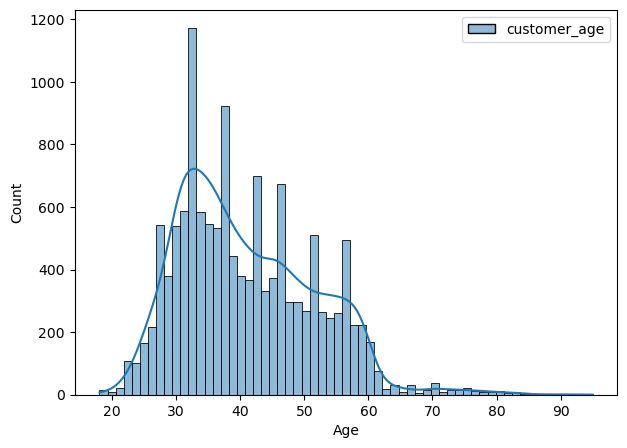

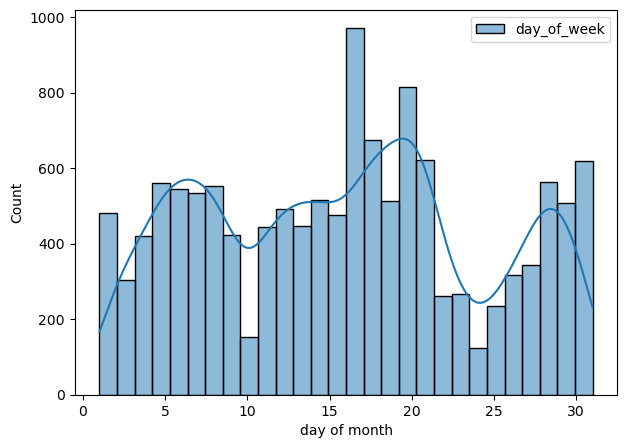

In [18]:
plt.figure(figsize=(7, 5))
sns.histplot(train_set_df[['customer_age']], kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(7, 5))
sns.histplot(train_set_df[['day_of_week']], kde=True)
plt.xlabel('day of month')
plt.ylabel('Count')
plt.show()

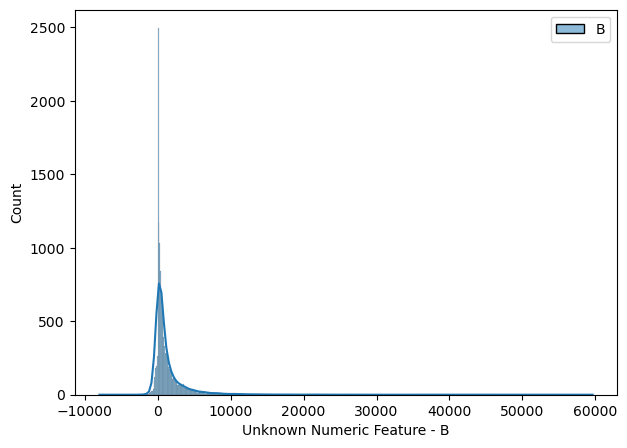

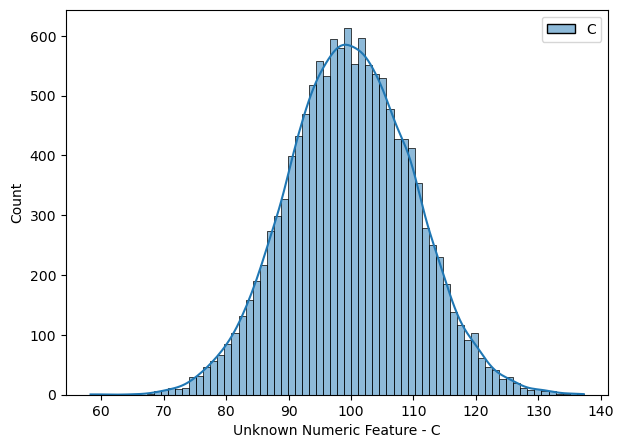

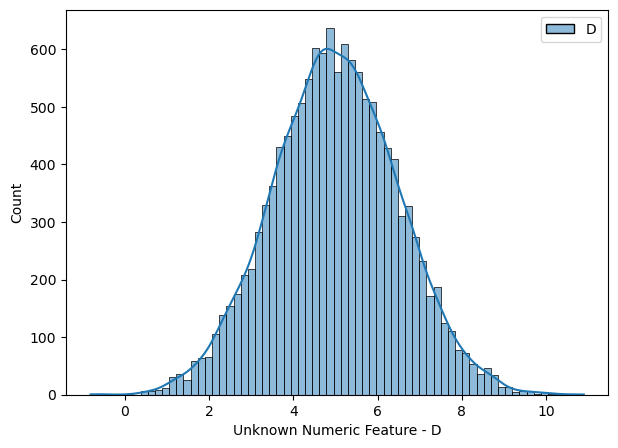

In [19]:
plt.figure(figsize=(7, 5))
sns.histplot(train_set_df[['B']], kde=True)
plt.xlabel('Unknown Numeric Feature - B')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(7, 5))
sns.histplot(train_set_df[['C']], kde=True)
plt.xlabel('Unknown Numeric Feature - C')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(7, 5))
sns.histplot(train_set_df[['D']], kde=True)
plt.xlabel('Unknown Numeric Feature - D')
plt.ylabel('Count')
plt.show()

In [20]:
# Function to cap outliers detected by Z-score
def cap_outliers_by_z_score(df, feature):
    z_scores = stats.zscore(df[feature])
    cap_value_top = df[feature][z_scores < 3].max()
    cap_value_bottom = df[feature][z_scores > -3].min()
    
    affected_rows_top = (z_scores > 3).sum()
    affected_rows_bottom = (z_scores < -3).sum()
    
    df[feature] = np.where(z_scores > 3, cap_value_top, df[feature])
    df[feature] = np.where(z_scores < -3, cap_value_bottom, df[feature])
    
    total_affected = affected_rows_top + affected_rows_bottom
    
    print(f"Outliers capped for {feature} by Z-score method. Total rows affected: {total_affected}")

# Function to cap outliers detected by IQR
def cap_outliers_by_iqr(df, feature):
    Q1 = df[feature].quantile(0.06)
    Q3 = df[feature].quantile(0.94)
    IQR = Q3 - Q1
    
    cap_value_top = Q3 + 1.5 * IQR
    cap_value_bottom = Q1 - 1.5 * IQR
    
    affected_rows_top = (df[feature] > cap_value_top).sum()
    affected_rows_bottom = (df[feature] < cap_value_bottom).sum()
    
    df[feature] = np.where(df[feature] > cap_value_top, cap_value_top, df[feature])
    df[feature] = np.where(df[feature] < cap_value_bottom, cap_value_bottom, df[feature])
    
    total_affected = affected_rows_top + affected_rows_bottom
    print(f"Outliers capped for {feature} by IQR method. Total rows affected: {total_affected}")



In [21]:
#before dm
#need to take care of B(!) and maybe C and D
cols=train_set_df.describe().columns
cols=list(cols)
print(cols)
for col in cols:
    cap_outliers_by_z_score(train_set_df, col)
    cap_outliers_by_iqr(train_set_df, col)

['customer_id', 'customer_age', 'day_of_week', 'current_campaign_contacts', 'current_campaign_contacts.1', 'previous_campaign_contacts', 'B', 'C', 'D']
Outliers capped for customer_id by Z-score method. Total rows affected: 0
Outliers capped for customer_id by IQR method. Total rows affected: 0
Outliers capped for customer_age by Z-score method. Total rows affected: 0
Outliers capped for customer_age by IQR method. Total rows affected: 0
Outliers capped for day_of_week by Z-score method. Total rows affected: 0
Outliers capped for day_of_week by IQR method. Total rows affected: 0
Outliers capped for current_campaign_contacts by Z-score method. Total rows affected: 0
Outliers capped for current_campaign_contacts by IQR method. Total rows affected: 132
Outliers capped for current_campaign_contacts.1 by Z-score method. Total rows affected: 0
Outliers capped for current_campaign_contacts.1 by IQR method. Total rows affected: 132
Outliers capped for previous_campaign_contacts by Z-score meth

### 2.Data manipulation

In [22]:
def data_manipulation(df):
    #filling nullified customer_id with ascending sequence and making customer_id as index
    try:
        nullified_indexes=df[df['customer_id'].isna()].index 
        indexes_for_customer_ids=list(range(0,len(nullified_indexes)))
        df.loc[nullified_indexes, 'customer_id'] = indexes_for_customer_ids
        df.set_index('customer_id', inplace=True) #making customer id an index

        #removing records with more than 3 nulls:
        df = df.dropna(thresh=len(df.columns) - 3)
        #dropping day of the week
        df = df.drop(columns=['day_of_week'])


        #comparing current_campaign_contancs and current_campaign_contacts.1 then deleting .1
        differents=df['current_campaign_contacts'] != df['current_campaign_contacts.1']
        differents_row=df[differents]
        df['current_campaign_contacts'] = df['current_campaign_contacts'].fillna(df['current_campaign_contacts.1'])
        df=df.drop(columns=['current_campaign_contacts.1'])
        #alligning the preffered call time column to have only Morning, Afternoon, Evening, Night
        df['preferred_call_time'] = df['preferred_call_time'].replace('eve', 'Evening')
        df['preferred_call_time'] = df['preferred_call_time'].replace('morning', 'Morning')
        df['preferred_call_time'] = df['preferred_call_time'].replace('Night ', 'Night')
        #alligning the has_device_payment_plan column to be no,yes
        df['has_device_payment_plan'] = df['has_device_payment_plan'].replace('No', 'no')
        #one-hot encode categorical columns
        categorical_cols = ['job_type', 'marital_status', 'preferred_contact_method', 'preferred_call_time', 'previous_campaign_outcome','Month']
        df = pd.get_dummies(df, columns=categorical_cols, drop_first=False)
        
        # map 'no' to 0, 'yes' to 1, and handle nulls by probability
        if "subscribed_to_new_plan" in df.columns: #flexibility for test and for train
            binary_cols = ['A', 'subscribed_to_new_plan', 'has_device_payment_plan','has_internet_service']
        else:
            binary_cols = ['A', 'has_device_payment_plan','has_internet_service']

        for col in binary_cols:
            yes_prob = df[col].value_counts(normalize=True).get('yes', 0)
            df[col] = df[col].map({'no': 0, 'yes': 1})
            df[col] = df[col].fillna(np.random.choice([0, 1], p=[1-yes_prob, yes_prob]))
        
        # map education_level values
        education_map = {'primary': 1, 'secondary': 2, 'tertiary': 3}
        df['education_level'] = df['education_level'].map(education_map)
        df['education_level'] = df['education_level'].fillna(df['education_level'].mean())
        
        # fill null values in numerical columns with their mean or median
        numerical_cols_mean_fill = ['customer_age', 'C', 'D']
        df[numerical_cols_mean_fill] = df[numerical_cols_mean_fill].apply(lambda x: x.fillna(x.mean()))
        numerical_cols_median_fill = ['current_campaign_contacts', 'previous_campaign_contacts', 'B']
        df[numerical_cols_median_fill] = df[numerical_cols_median_fill].apply(lambda x: x.fillna(x.median()))

        #downsampling the no to match the yes
        if "subscribed_to_new_plan" in df.columns:
            yes_df = df[train_set_df['subscribed_to_new_plan'] == 'yes']
            no_df = df[train_set_df['subscribed_to_new_plan'] == 'no']
            no_downsampled_df = no_df.sample(n=len(yes_df), random_state=42)
            df = pd.concat([yes_df, no_downsampled_df])

    except KeyError:
        print("already manipulated the data, please reload it (2nd row)")
        return df
    return df

In [23]:
train_set_df=data_manipulation(train_set_df)
train_set_df.isna().sum() #checking for missing entries

C:\Users\orsal\AppData\Local\Temp\ipykernel_4912\1779954380.py:54: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  yes_df = df[train_set_df['subscribed_to_new_plan'] == 'yes']
C:\Users\orsal\AppData\Local\Temp\ipykernel_4912\1779954380.py:55: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_df = df[train_set_df['subscribed_to_new_plan'] == 'no']


customer_age                         0
education_level                      0
has_internet_service                 0
has_device_payment_plan              0
current_campaign_contacts            0
previous_campaign_contacts           0
A                                    0
B                                    0
C                                    0
D                                    0
subscribed_to_new_plan               0
job_type_admin.                      0
job_type_blue-collar                 0
job_type_entrepreneur                0
job_type_housemaid                   0
job_type_management                  0
job_type_retired                     0
job_type_self-employed               0
job_type_services                    0
job_type_student                     0
job_type_technician                  0
job_type_unemployed                  0
marital_status_divorced              0
marital_status_married               0
marital_status_single                0
preferred_contact_method_

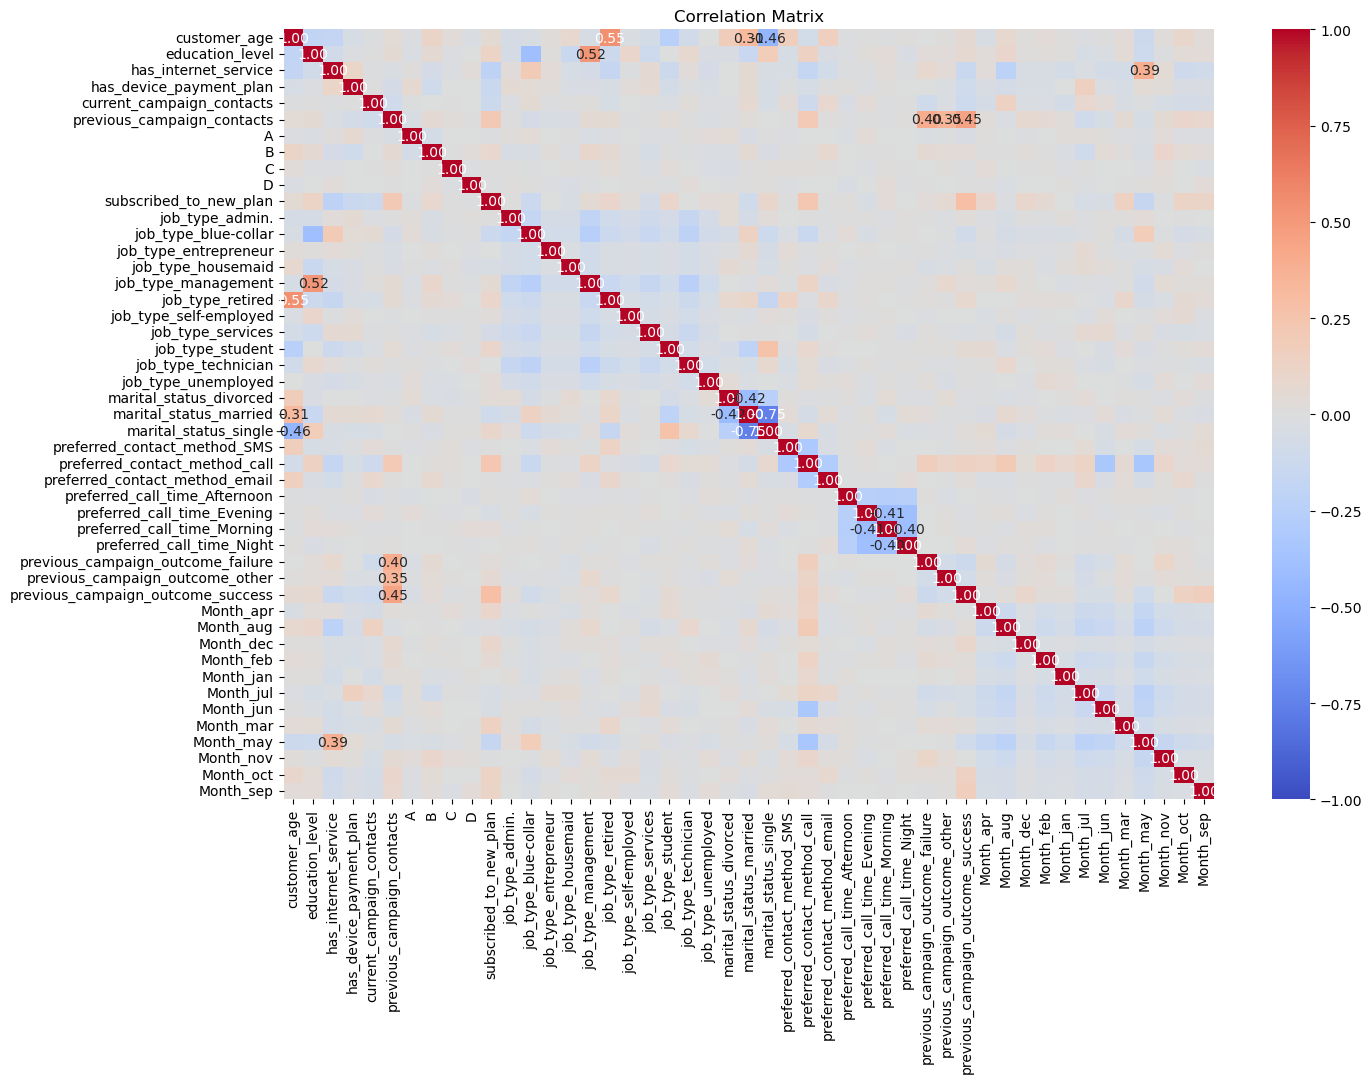

In [24]:
correlation_matrix = train_set_df.corr()
annot_data = correlation_matrix.where((correlation_matrix >= 0.3) | (correlation_matrix <= -0.4), '')
annot_data = annot_data.applymap(lambda x: f'{x:.2f}' if isinstance(x, (int, float)) and x != '' else '')

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=annot_data ,fmt='' ,cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

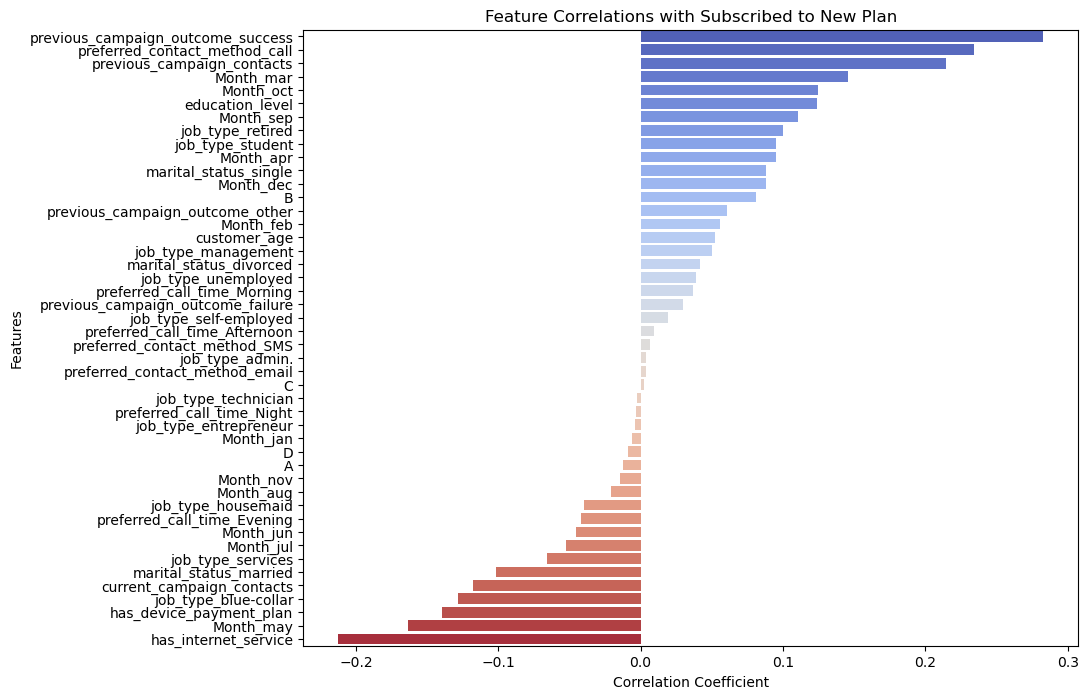

In [25]:
subscribed_corr = correlation_matrix['subscribed_to_new_plan'].drop('subscribed_to_new_plan')
subscribed_corr_sorted = subscribed_corr.sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=subscribed_corr_sorted.values, y=subscribed_corr_sorted.index, palette='coolwarm')
plt.title('Feature Correlations with Subscribed to New Plan')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

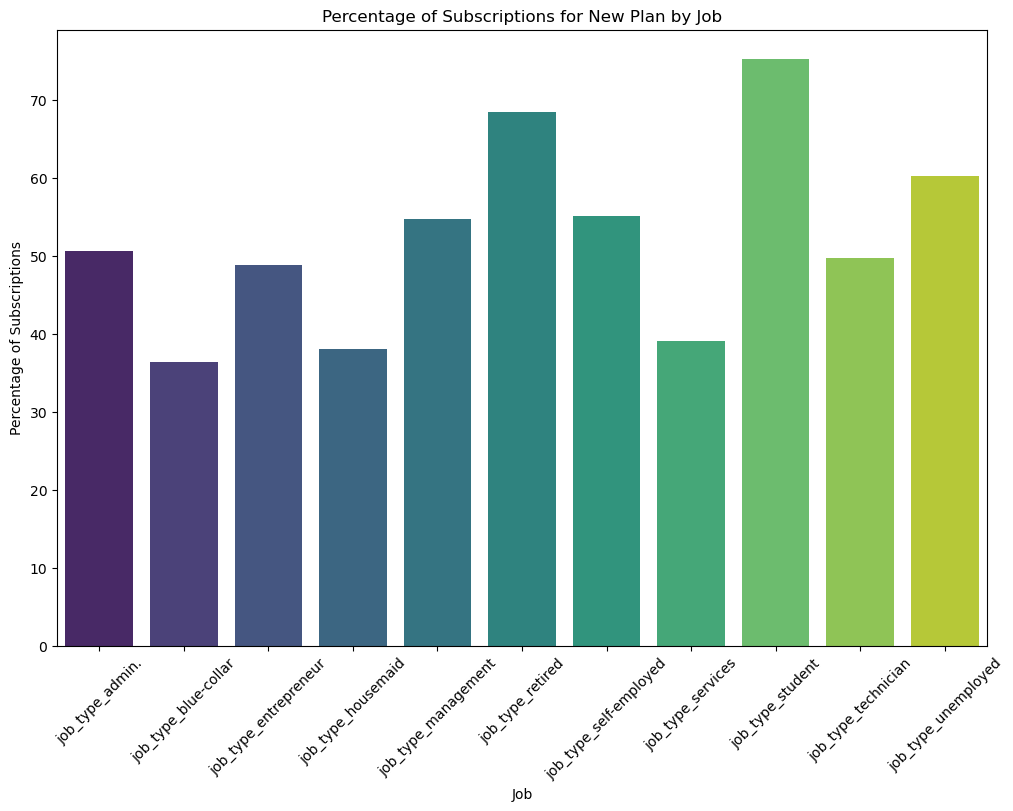

In [27]:
# Find the job columns (excluding the subscription column)
job_columns = ['job_type_admin.', 'job_type_blue-collar', 'job_type_entrepreneur', 'job_type_housemaid', 'job_type_management', 'job_type_retired', 'job_type_self-employed', 'job_type_services', 'job_type_student', 'job_type_technician', 'job_type_unemployed']

# Calculate the total number of people in each job
total_by_job = train_set_df[job_columns].sum()

# Calculate the number of people who subscribed to the new plan in each job
subscribed_by_job = train_set_df[train_set_df['subscribed_to_new_plan'] == 1][job_columns].sum()

# Calculate the percentages
percentage_subscribed_by_job = (subscribed_by_job / total_by_job) * 100

# Create a bar plot for each job category
plt.figure(figsize=(12, 8))
sns.barplot(x=percentage_subscribed_by_job.index, y=percentage_subscribed_by_job.values, palette="viridis")
plt.title('Percentage of Subscriptions for New Plan by Job')
plt.xlabel('Job')
plt.ylabel('Percentage of Subscriptions')
plt.xticks(rotation=45)
plt.show()

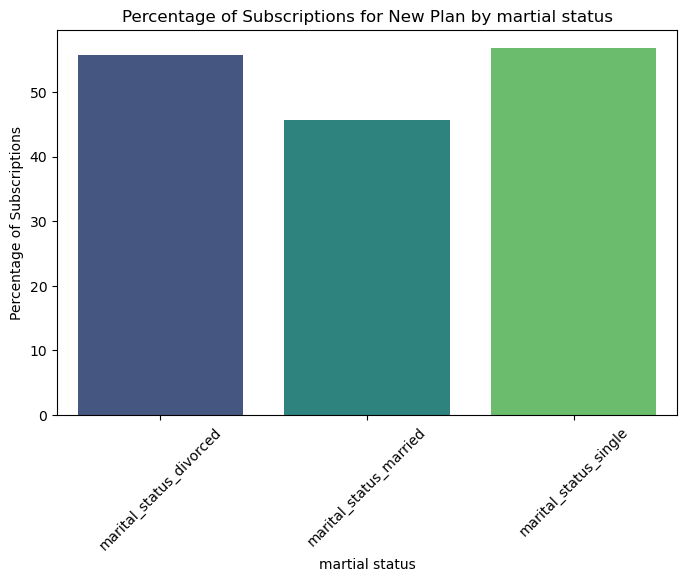

In [28]:
# Find the martial_status columns (excluding the subscription column)
martial_status_columns = ['marital_status_divorced', 'marital_status_married', 'marital_status_single']
# Calculate the total number of people in each martial_status
total_by_martial_status = train_set_df[martial_status_columns].sum()

# Calculate the number of people who subscribed to the new plan in each job
subscribed_by_martial_status = train_set_df[train_set_df['subscribed_to_new_plan'] == 1][martial_status_columns].sum()

# Calculate the percentages
percentage_subscribed_by_martial_status = (subscribed_by_martial_status / total_by_martial_status) * 100

# Create a bar plot for each martial_status category
plt.figure(figsize=(8, 5))
sns.barplot(x=percentage_subscribed_by_martial_status.index, y=percentage_subscribed_by_martial_status.values, palette="viridis")
plt.title('Percentage of Subscriptions for New Plan by martial status')
plt.xlabel('martial status')
plt.ylabel('Percentage of Subscriptions')
plt.xticks(rotation=45)
plt.show()

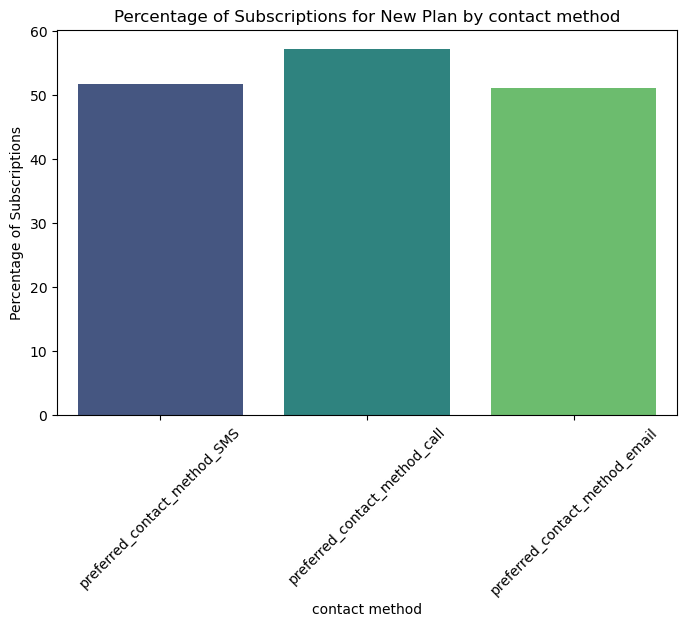

In [29]:
contact_method_columns = ['preferred_contact_method_SMS', 'preferred_contact_method_call', 'preferred_contact_method_email']
total_by_contact_method = train_set_df[contact_method_columns].sum()

subscribed_by_contact_method = train_set_df[train_set_df['subscribed_to_new_plan'] == 1][contact_method_columns].sum()

percentage_subscribed_by_contact_method = (subscribed_by_contact_method / total_by_contact_method) * 100

plt.figure(figsize=(8, 5))
sns.barplot(x=percentage_subscribed_by_contact_method.index, y=percentage_subscribed_by_contact_method.values, palette="viridis")
plt.title('Percentage of Subscriptions for New Plan by contact method')
plt.xlabel('contact method')
plt.ylabel('Percentage of Subscriptions')
plt.xticks(rotation=45)
plt.show()

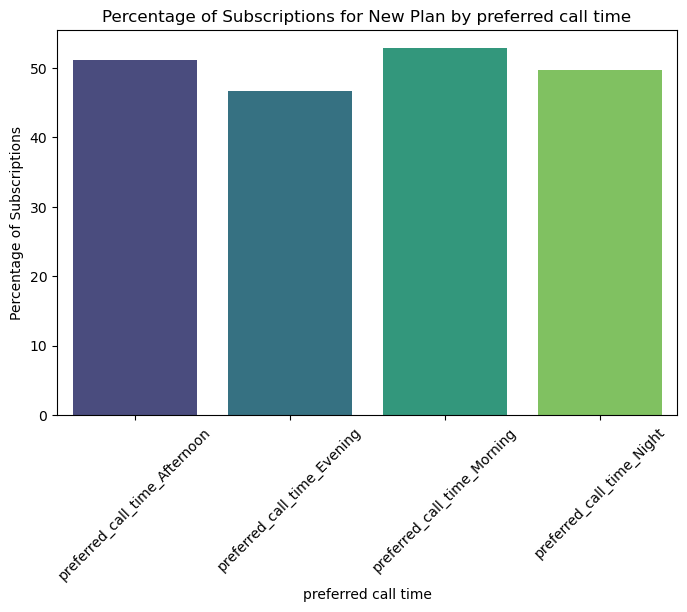

In [30]:
preferred_call_time_columns = ['preferred_call_time_Afternoon', 'preferred_call_time_Evening', 'preferred_call_time_Morning', 'preferred_call_time_Night']
total_by_preferred_call_time = train_set_df[preferred_call_time_columns].sum()

subscribed_by_preferred_call_time = train_set_df[train_set_df['subscribed_to_new_plan'] == 1][preferred_call_time_columns].sum()

percentage_subscribed_by_preferred_call_time = (subscribed_by_preferred_call_time / total_by_preferred_call_time) * 100

plt.figure(figsize=(8, 5))
sns.barplot(x=percentage_subscribed_by_preferred_call_time.index, y=percentage_subscribed_by_preferred_call_time.values, palette="viridis")
plt.title('Percentage of Subscriptions for New Plan by preferred call time')
plt.xlabel('preferred call time')
plt.ylabel('Percentage of Subscriptions')
plt.xticks(rotation=45)
plt.show()

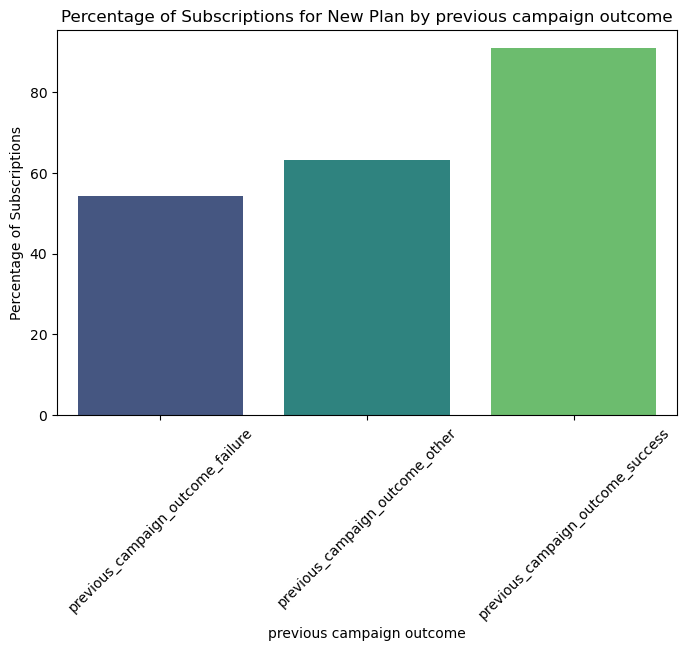

In [31]:
previous_campaign_outcome_columns = ['previous_campaign_outcome_failure', 'previous_campaign_outcome_other', 'previous_campaign_outcome_success']
total_by_previous_campaign_outcome = train_set_df[previous_campaign_outcome_columns].sum()

subscribed_by_previous_campaign_outcome = train_set_df[train_set_df['subscribed_to_new_plan'] == 1][previous_campaign_outcome_columns].sum()

percentage_subscribed_by_previous_campaign_outcome = (subscribed_by_previous_campaign_outcome / total_by_previous_campaign_outcome) * 100

plt.figure(figsize=(8, 5))
sns.barplot(x=percentage_subscribed_by_previous_campaign_outcome.index, y=percentage_subscribed_by_previous_campaign_outcome.values, palette="viridis")
plt.title('Percentage of Subscriptions for New Plan by previous campaign outcome')
plt.xlabel('previous campaign outcome')
plt.ylabel('Percentage of Subscriptions')
plt.xticks(rotation=45)
plt.show()

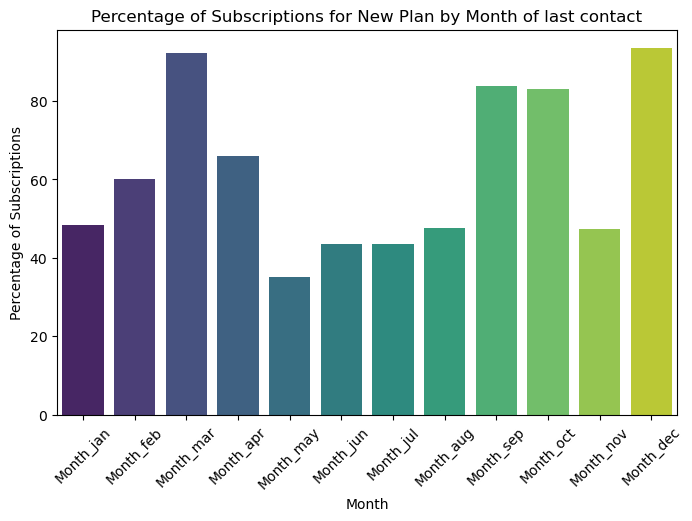

In [32]:
Month_columns = ['Month_jan', 'Month_feb', 'Month_mar', 'Month_apr', 'Month_may', 'Month_jun', 'Month_jul', 'Month_aug', 'Month_sep', 'Month_oct', 'Month_nov', 'Month_dec']
total_by_Month = train_set_df[Month_columns].sum()

subscribed_by_Month = train_set_df[train_set_df['subscribed_to_new_plan'] == 1][Month_columns].sum()

percentage_subscribed_by_Month = (subscribed_by_Month / total_by_Month) * 100

plt.figure(figsize=(8, 5))
sns.barplot(x=percentage_subscribed_by_Month.index, y=percentage_subscribed_by_Month.values, palette="viridis")
plt.title('Percentage of Subscriptions for New Plan by Month of last contact')
plt.xlabel('Month')
plt.ylabel('Percentage of Subscriptions')
plt.xticks(rotation=45)
plt.show()

### 3.Model selections

##### logistic regression

In [33]:
#splitting for train and tests
X = train_set_df.drop('subscribed_to_new_plan', axis=1)
y = train_set_df['subscribed_to_new_plan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
#scaling
scaler=MinMaxScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [35]:
#grid search for best params
log_reg = LogisticRegression(max_iter=1000)
param_grid = {
    'select__k': [5,10,15,20,25],  # Number of features to select
    'log_reg__C': [0.1, 1, 10, 100],  # Regularization parameter
    'log_reg__solver': ['newton-cg', 'lbfgs', 'liblinear']  # Solver to use
}
pipeline = Pipeline([
    ('select', SelectKBest(score_func=f_classif)),
    ('log_reg', log_reg)
])

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# print results
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Best parameters found:  {'log_reg__C': 1, 'log_reg__solver': 'lbfgs', 'select__k': 25}
Best cross-validation score:  0.759734164212982


In [36]:
#check which are the selected features
selected_features = best_model.named_steps['select'].get_support(indices=True)
selected_feature_names = train_set_df.columns[selected_features]
selected_feature_names_lst=selected_feature_names.to_list()
print("Selected features:", selected_feature_names)

Selected features: Index(['education_level', 'has_internet_service', 'has_device_payment_plan',
       'current_campaign_contacts', 'previous_campaign_contacts', 'B',
       'job_type_admin.', 'job_type_housemaid', 'job_type_management',
       'job_type_self-employed', 'job_type_services',
       'marital_status_divorced', 'marital_status_married',
       'preferred_contact_method_SMS', 'preferred_call_time_Afternoon',
       'preferred_call_time_Evening', 'previous_campaign_outcome_failure',
       'previous_campaign_outcome_other', 'previous_campaign_outcome_success',
       'Month_aug', 'Month_dec', 'Month_jun', 'Month_mar', 'Month_nov',
       'Month_oct'],
      dtype='object')


In [37]:
#using the best model
log_reg_model = best_model.named_steps['log_reg']
print("Logistic Regression Model:", log_reg_model)
log_reg_model = best_model
y_pred_log_reg = log_reg_model.predict(X_test)
y_pred_prob_log_reg = log_reg_model.predict_proba(X_test)[:, 1]


# compute model metrics
log_reg_metrics = {
    "accuracy": accuracy_score(y_test, y_pred_log_reg),
    "precision": precision_score(y_test, y_pred_log_reg),
    "recall": recall_score(y_test, y_pred_log_reg),
    "f1_score": f1_score(y_test, y_pred_log_reg),
    "auc_roc": roc_auc_score(y_test, y_pred_prob_log_reg)
}
print("Logistic Regression Metrics:", log_reg_metrics)

Logistic Regression Model: LogisticRegression(C=1, max_iter=1000)
Logistic Regression Metrics: {'accuracy': 0.6889250814332247, 'precision': 0.75, 'recall': 0.5962145110410094, 'f1_score': 0.6643233743409491, 'auc_roc': 0.734081084238813}


##### Desicion tree

In [38]:
#init desicion tree and cross validating it
dt_model = DecisionTreeClassifier(random_state=42,max_depth=5)
dt_scores = cross_val_score(dt_model, X, y, cv=5, scoring='roc_auc')
print("Decision Tree cross-validation scores:", dt_scores)
print("Decision Tree average score:", dt_scores.mean())

# train best model
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
y_pred_prob_dt = dt_model.predict_proba(X_test)[:, 1]

#printing info over the tree
print("Decision Tree Model Parameters:")
print(f"Max Depth: {dt_model.get_depth()}")
print(f"Min Samples Split: {dt_model.min_samples_split}")
print(f"Min Samples Leaf: {dt_model.min_samples_leaf}")

# compute model metrics
dt_metrics = {
    "accuracy": accuracy_score(y_test, y_pred_dt),
    "precision": precision_score(y_test, y_pred_dt),
    "recall": recall_score(y_test, y_pred_dt),
    "f1_score": f1_score(y_test, y_pred_dt),
    "auc_roc": roc_auc_score(y_test, y_pred_prob_dt)}

Decision Tree cross-validation scores: [0.72136574 0.71464419 0.76210888 0.73078759 0.69809759]
Decision Tree average score: 0.7254008000084882
Decision Tree Model Parameters:
Max Depth: 5
Min Samples Split: 2
Min Samples Leaf: 1


In [39]:
#optional - research the selected tree - if you have graphviz installed

# features_list=train_set_df.columns.to_list()
# features_list.pop(10)
# dot_data=export_graphviz(dt_model,out_file=None,feature_names=features_list,
#                          class_names=["0","1"],rounded=True,proportion=False,impurity=True,label='all',precision=2,filled=True)
# graph=graphviz.Source(dot_data)
# graph

##### Random forest

In [40]:
#init random forest and cross validating it
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1,max_depth=5)
rf_scores = cross_val_score(rf_model, X, y, cv=5, scoring='roc_auc')
print("Random Forest cross-validation scores:", rf_scores)
print("Random Forest average score:", rf_scores.mean())

# train best model
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]

#printing info on one of the trees
tree = rf_model.estimators_[0]

print("Random Forest Model Parameters (for one tree):")
print(f"Max Depth: {tree.get_depth()}")
print(f"Min Samples Split: {tree.min_samples_split}")
print(f"Min Samples Leaf: {tree.min_samples_leaf}")

# compute model metrics
rf_metrics = {
    "accuracy": accuracy_score(y_test, y_pred_rf),
    "precision": precision_score(y_test, y_pred_rf),
    "recall": recall_score(y_test, y_pred_rf),
    "f1_score": f1_score(y_test, y_pred_rf),
    "auc_roc": roc_auc_score(y_test, y_pred_prob_rf)
}


Random Forest cross-validation scores: [0.76644845 0.73824656 0.79286783 0.78995003 0.73201838]
Random Forest average score: 0.7639062483421576
Random Forest Model Parameters (for one tree):
Max Depth: 5
Min Samples Split: 2
Min Samples Leaf: 1


In [41]:
#feature importance analysis
features_list=train_set_df.columns.to_list()
features_list.pop(10)
importances=rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features_list,
    'Importance': importances
})

# sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
33,previous_campaign_outcome_success,0.154450
25,preferred_contact_method_call,0.123180
5,previous_campaign_contacts,0.102397
0,customer_age,0.095421
2,has_internet_service,0.089577
7,B,0.055264
42,Month_may,0.041469
41,Month_mar,0.036731
4,current_campaign_contacts,0.029542
1,education_level,0.025469


##### SVM (or SVC as it is for classification)

In [42]:
#lowering the dimesionality so the model will run in acceptable time
df_svm = train_set_df[selected_feature_names_lst]

# gridsearch
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}
svc = SVC(probability=True)
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_svc_model = grid_search.best_estimator_

print("Best parameters found:", best_params)

# use the best model
y_pred_svc = best_svc_model.predict(X_test)
y_pred_prob_svc = best_svc_model.predict_proba(X_test)[:, 1]

# compute model metrics
svc_metrics = {
    "accuracy": accuracy_score(y_test, y_pred_svc),
    "precision": precision_score(y_test, y_pred_svc),
    "recall": recall_score(y_test, y_pred_svc),
    "f1_score": f1_score(y_test, y_pred_svc),
    "auc_roc": roc_auc_score(y_test, y_pred_prob_svc)
}


print("SVC Metrics:", svc_metrics)


Best parameters found: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
SVC Metrics: {'accuracy': 0.6824104234527687, 'precision': 0.7479674796747967, 'recall': 0.580441640378549, 'f1_score': 0.6536412078152753, 'auc_roc': 0.7364284272801622}


##### Model choosing

In [43]:

# compare metrics
metrics_df = pd.DataFrame({
    "Logistic Regression": log_reg_metrics,
    "Decision Tree": dt_metrics,
    "Random Forest": rf_metrics,
    "SVC": svc_metrics
})

print(metrics_df)

# choose best model by auc_roc
best_model_name = metrics_df.loc['auc_roc'].idxmax()
print(f"The best model based on auc_roc is: {best_model_name}")


           Logistic Regression  Decision Tree  Random Forest       SVC
accuracy              0.688925       0.674267       0.682410  0.682410
precision             0.750000       0.755459       0.731061  0.747967
recall                0.596215       0.545741       0.608833  0.580442
f1_score              0.664323       0.633700       0.664372  0.653641
auc_roc               0.734081       0.707342       0.736726  0.736428
The best model based on auc_roc is: Random Forest


### 4. model evaluation

In [44]:
def evaluation(model,y_pred):

    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg_model.classes_)
    disp.plot()
    plt.show()
    tn, fp, fn, tp = cm.ravel()
    print(f"True Negatives (TN): {tn}")
    print(f"False Positives (FP): {fp}")
    print(f"False Negatives (FN): {fn}")
    print(f"True Positives (TP): {tp}")
    # define the stratified k-fold cross-validator
    kf = StratifiedKFold(n_splits=5)
    
    # init lists to store tprs and aucs
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    # plot roc curve for each fold
    plt.figure(figsize=(10, 8))
    
    for i, (train_index, test_index) in enumerate(kf.split(X, y)):
        #kfold fit and pred
        X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train_fold, y_train_fold)
        y_pred_prob = model.predict_proba(X_test_fold)[:, 1]
        
        # roc curve and area under the curve
        fpr, tpr, _ = roc_curve(y_test_fold, y_pred_prob)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        
        # true positive rates
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        
        plt.plot(fpr, tpr, lw=2, alpha=0.3, label=f'ROC fold {i+1} (AUC = {roc_auc:.2f})')
    
    #plot the mean roc curve
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f})', lw=2, alpha=0.8)
    
    #plot the random chance line
    plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random chance', lw=2)
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

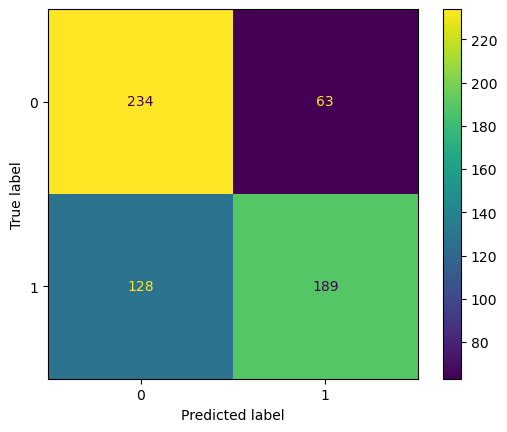

True Negatives (TN): 234
False Positives (FP): 63
False Negatives (FN): 128
True Positives (TP): 189


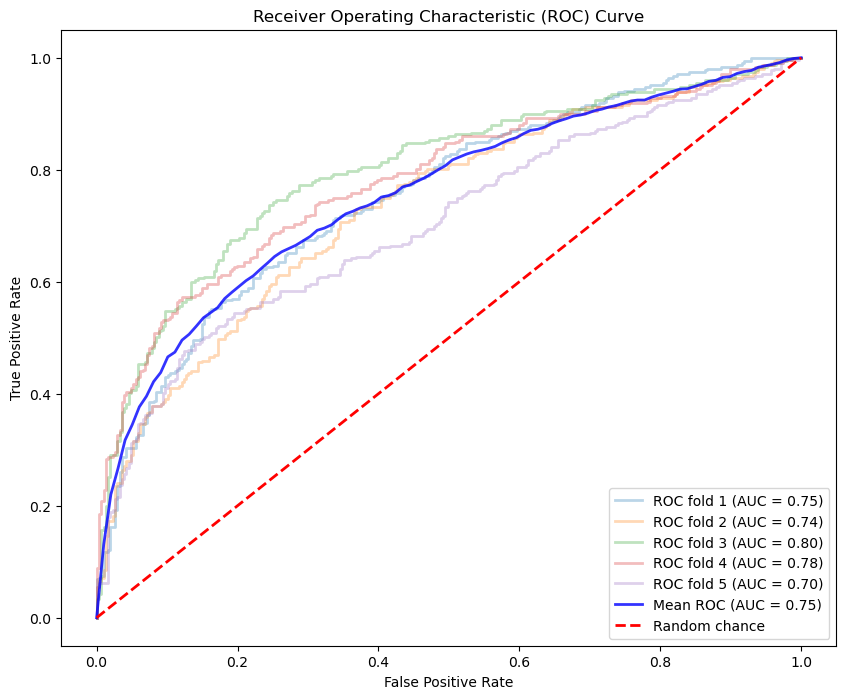

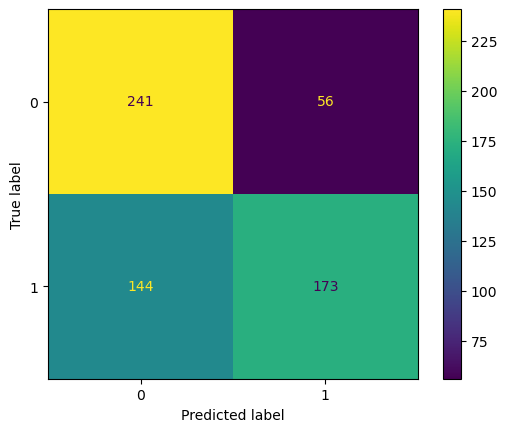

True Negatives (TN): 241
False Positives (FP): 56
False Negatives (FN): 144
True Positives (TP): 173


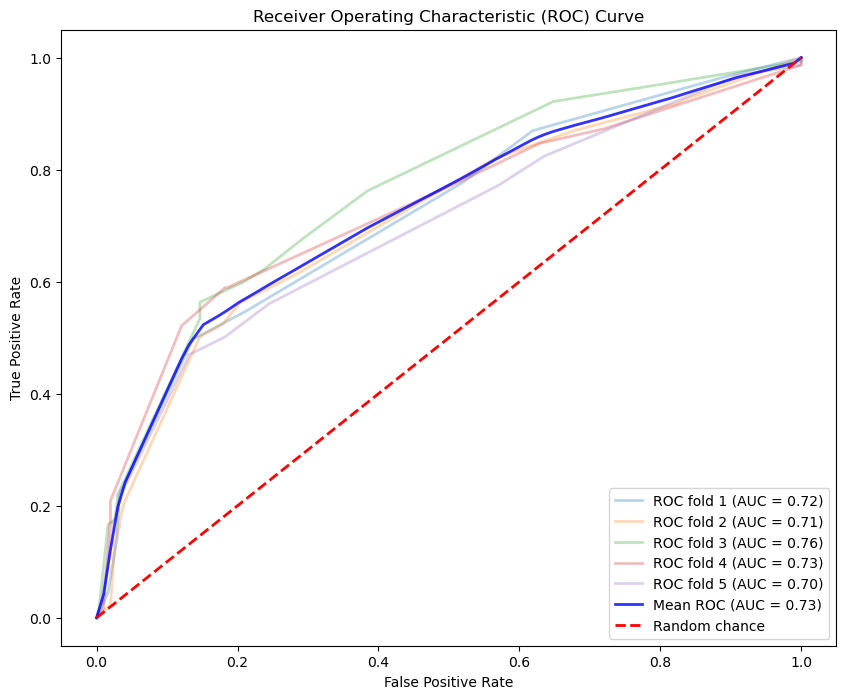

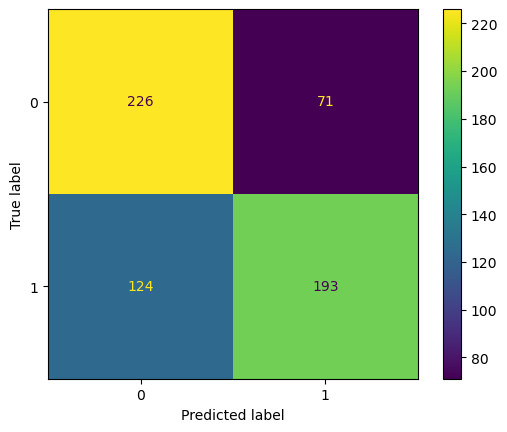

True Negatives (TN): 226
False Positives (FP): 71
False Negatives (FN): 124
True Positives (TP): 193


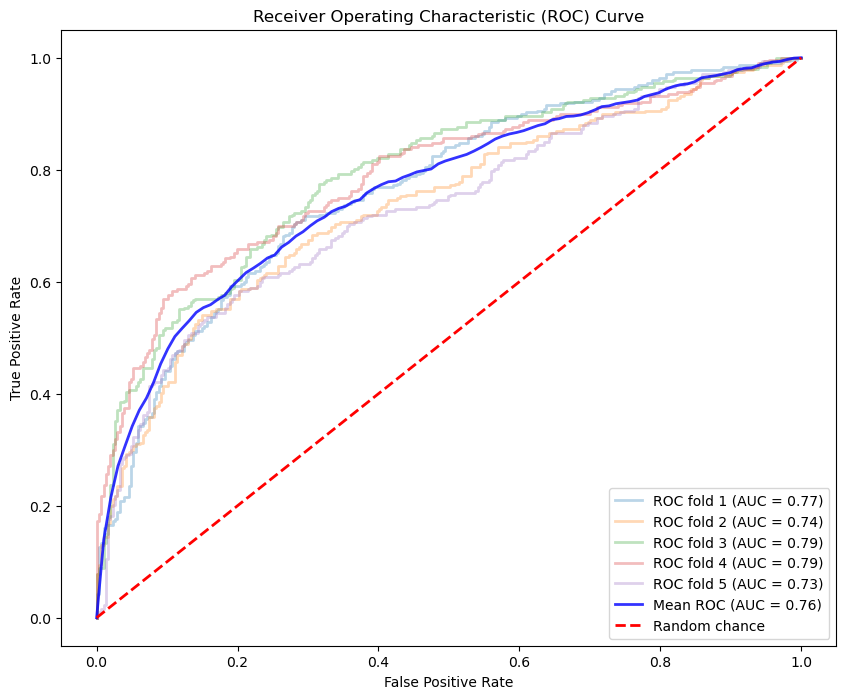

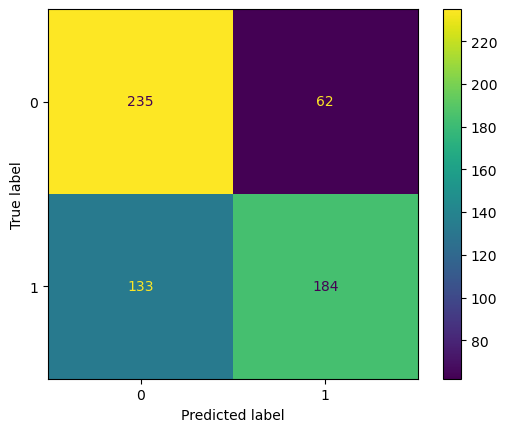

True Negatives (TN): 235
False Positives (FP): 62
False Negatives (FN): 133
True Positives (TP): 184


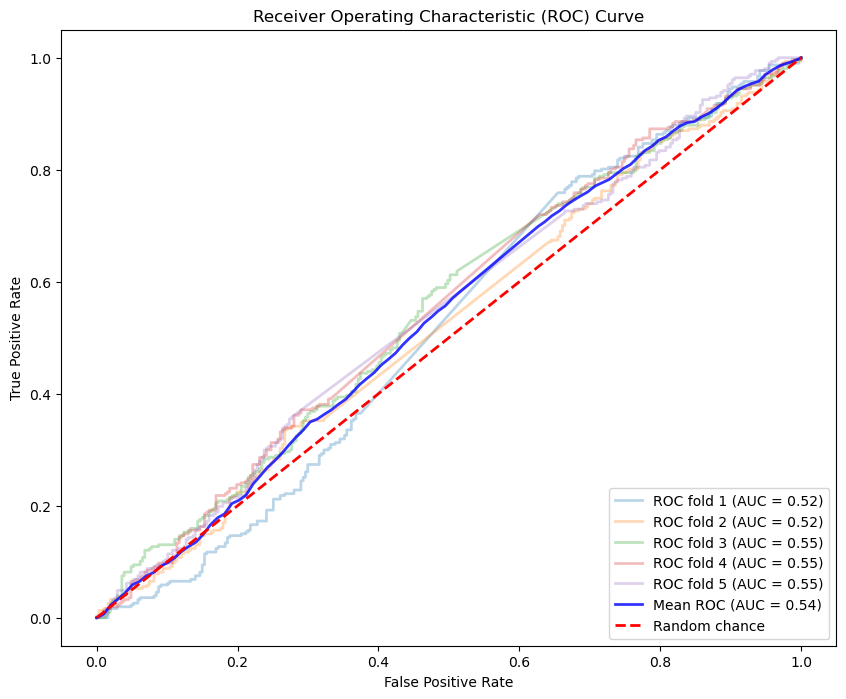

In [45]:
evaluation(log_reg_model,y_pred_log_reg)
evaluation(dt_model,y_pred_dt)
evaluation(rf_model,y_pred_rf)
evaluation(best_svc_model,y_pred_svc)

### 5. Predict over test

In [46]:
tests_set_df=data_manipulation(tests_set_df)
X_test_scaled = scaler.transform(tests_set_df)

# Make predictions using the best model
y_test_pred = best_model.predict(X_test_scaled)
y_test_pred_prob = best_model.predict_proba(X_test_scaled)[:, 1]

# Create a DataFrame to store the predictions and their probabilities
predictions_df = pd.DataFrame({
    'predictions': y_test_pred,
    'prediction_probabilities': y_test_pred_prob
})


# Save the predictions to a CSV file
predictions_df.to_csv('Submission_group_13.csv', index=True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(
